<a href="https://colab.research.google.com/github/Dashnyam7/DIC_assignment/blob/main/Logistic_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Hypothetical function

In [1]:
def _sigmoid(self,y):
        """sigmoid function"""
        return 1 / (1 + np.exp(-y))

In [2]:
def _logistic_hypothesis(self, X):
    pred = X @ self.theta
    pred = self._sigmoid(pred)
    return pred

# [Question 2] The steepest descent method

In [3]:
def _gradient_descent(self, X, y):
    m = X.shape[0]
    n = X.shape[1]
    pred = self._logistic_hypothesis(X)
    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (pred[i] - y[i]) * X[i, j]
        self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)

# [Question 3] Presumption

In [6]:
def predict(self, X):
        """
        Estimate labels using logistic regression。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimation result by logistic regression
        """

        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

def predict_proba(self, X):
        """
        Estimate probabilities using logistic regression。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimation result by logistic regression
        """

        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred

# [Question 4] Objective function

In [7]:
def _loss_func(self, pred, y):
    error = 0
    for i in range(y.shape[0]):
        error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
    loss = error / (y.shape[0])
    loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
    return loss

# [Question 5] Learning and Estimation

In [19]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val=None, y_val=None):
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}th training loss is {}'.format(i,loss))

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid function"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        """
        Estimate labels using logistic regression。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimation result by logistic regression
        """

        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        """
        Estimate probabilities using logistic regression。

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimation result by logistic regression
        """

        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [25]:
slr = ScratchLogisticRegression(num_iter=100, lr=0.01, bias=True, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)


0th training loss is 0.6931472133128265
1th training loss is 0.6879536700056779
2th training loss is 0.682930008189488
3th training loss is 0.678046351847922
4th training loss is 0.6732797587115128
5th training loss is 0.6686125974688274
6th training loss is 0.6640313005665729
7th training loss is 0.6595254076591273
8th training loss is 0.6550868330792795
9th training loss is 0.6507093054739871
10th training loss is 0.6463879394735672
11th training loss is 0.6421189084633259
12th training loss is 0.637899194688378
13th training loss is 0.6337263984649925
14th training loss is 0.6295985925433228
15th training loss is 0.6255142109485502
16th training loss is 0.6214719641439347
17th training loss is 0.6174707742856993
18th training loss is 0.6135097258128288
19th training loss is 0.6095880277405088
20th training loss is 0.6057049848856065
21th training loss is 0.6018599759089209
22th training loss is 0.5980524365598813
23th training loss is 0.594281846891694
24th training loss is 0.590547

In [26]:
slr.predict(X_test).T

array([[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]])

In [27]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

# [Question 6] Learning curve plot

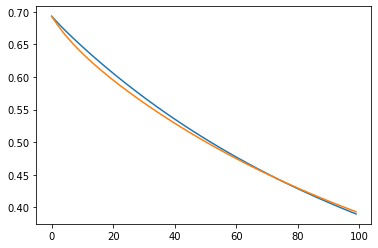

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

# [Problem 7] Visualization of the decision region

In [38]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=False,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

In [36]:
from matplotlib.colors import ListedColormap
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

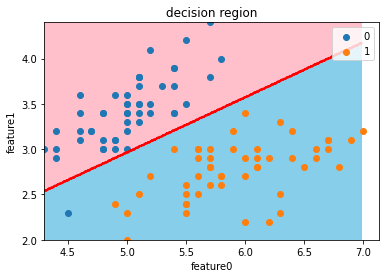

In [37]:
decision_region(X,y,slr)